In [177]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_studyresults = pd.merge(mouse_metadata, study_results, on =["Mouse ID"] )

# Display the data table for preview
mouse_studyresults.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [178]:
 # Checking the number of mice
len(mouse_studyresults["Mouse ID"].value_counts())

249

In [179]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicates= mouse_studyresults[mouse_studyresults.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [180]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data= mouse_studyresults.loc[mouse_studyresults['Mouse ID'] == "g989",:]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [181]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_datas = mouse_studyresults.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_datas

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [182]:
# Checking the number of mice in the clean DataFrame
clean_datas.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [183]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_grouping=clean_datas.groupby(["Drug Regimen"])
drug_sumamrydf= round(drug_grouping ["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"],2))
drug_sumamrydf

drug_sumamrydf= drug_sumamrydf.rename(columns={"mean": "Median Tumor Volume", "median" : "Median Tumor Volume", "var" : "Variance Tumor Volume", "std" : "Standard Deviation Tumor Volume", "sem" : "SEM Tumor Volume"})
drug_sumamrydf

,Median Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,41.0,42.0,25.0,5.0,0.0
Ceftamin,53.0,52.0,39.0,6.0,0.0
Infubinol,53.0,52.0,43.0,7.0,0.0
Ketapril,55.0,54.0,69.0,8.0,1.0
Naftisol,54.0,53.0,66.0,8.0,1.0
Placebo,54.0,52.0,61.0,8.0,1.0
Propriva,52.0,51.0,43.0,7.0,1.0
Ramicane,40.0,41.0,23.0,5.0,0.0
Stelasyn,54.0,52.0,59.0,8.0,1.0


In [184]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

drug_grouping=clean_datas.groupby(["Drug Regimen"])
average_tv= round(drug_grouping["Tumor Volume (mm3)"].mean(),2)
average_tv

median_tv= round(drug_grouping["Tumor Volume (mm3)"].median(),2)
median_tv

variance_tv=round(drug_grouping["Tumor Volume (mm3)"].var(),2)
variance_tv

standev_tv=round(drug_grouping["Tumor Volume (mm3)"].std(),2)
standev_tv

Sem_tv= round(drug_grouping["Tumor Volume (mm3)"].sem(),2)
Sem_tv

drugsummary= pd.DataFrame({"Mean Tumor Volume" : average_tv, "Median Tumor Volume" : median_tv, "Variance Tumor Volume" : variance_tv, "Standard Deviation Tumor Volume" : standev_tv, "SEM Tumor Volume" : Sem_tv})
drugsummary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<AxesSubplot:title={'center':'Total number of mice per drug regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

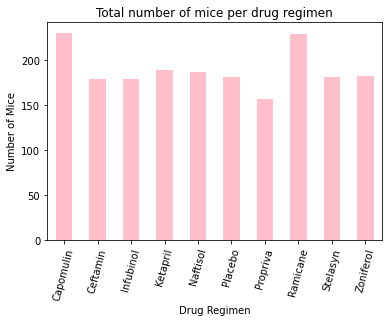

In [185]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
totalmice= drug_grouping["Mouse ID"].count() 
total_pdplot= totalmice.plot.bar(rot= 75, title= "Total number of mice per drug regimen", color = 'pink')
total_pdplot

total_pdplot.set_ylabel("Number of Mice")
total_pdplot

Text(0, 0.5, 'Number of Mice')

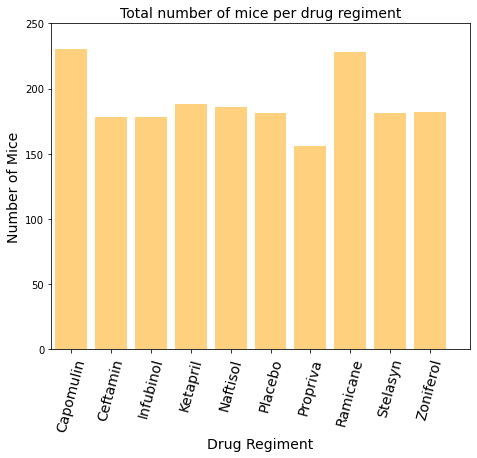

In [186]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(totalmice))
y_axis= totalmice

tx=list(totalmice.index.values)
ticks =[value for value in x_axis]

plt.figure(figsize=(7.5,6))
plt.bar(x_axis, y_axis, color= 'orange', alpha = 0.5, align = 'center')
plt.xticks(ticks, tx, rotation="75", fontsize = 14)

plt.xlim(-0.5,len(x_axis))
plt.ylim(0,250)

plt.title("Total number of mice per drug regiment", fontsize = 14)
plt.xlabel("Drug Regiment", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)

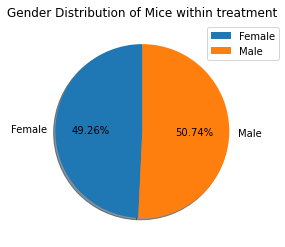

In [187]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderdistrib= clean_datas.groupby(["Sex"]).count()
genderpie= genderdistrib.plot(kind= "pie", y = "Mouse ID", title = "Gender Distribution of Mice within treatment", autopct = "%.2f%%", shadow = True, startangle = 90)

genderpie.set_ylabel("")
genderpie.legend(loc= 'upper right', frameon = True, bbox_to_anchor = (1.15,1))


Male      958
Female    930
Name: Sex, dtype: int64

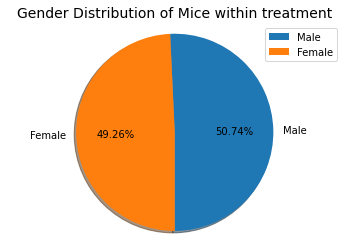

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genderpyplot= clean_datas["Sex"]. value_counts()
explode = (0,0)
labels = list(genderpyplot.index)

plt.pie(genderpyplot, explode = explode, labels = labels, autopct = "%1.2f%%", shadow = True, startangle = 270)
plt.title("Gender Distribution of Mice within treatment", fontsize = 14)
plt.legend(labels, loc= 'upper right', frameon = True, bbox_to_anchor = (1,1))
plt.axis("equal")
genderpyplot


In [189]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime= clean_datas.groupby(["Mouse ID"])["Timepoint"].max()
maxtime


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxmerge= pd.merge(maxtime, clean_datas, on = (["Mouse ID", "Timepoint"]))
maxmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [190]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
        tx_regimen= maxmerge.loc[maxmerge["Drug Regimen"] == treatment]
        tumorvol=tx_regimen["Tumor Volume (mm3)"]
        tumor_vol_data.append(tumorvol)

# Determine outliers using upper and lower bounds
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")


For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


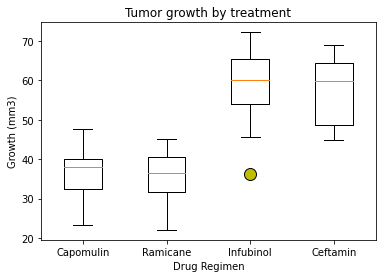

In [191]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict( markerfacecolor='y', markersize=12,
                  linestyle='none')

fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)

ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")

plt.show()

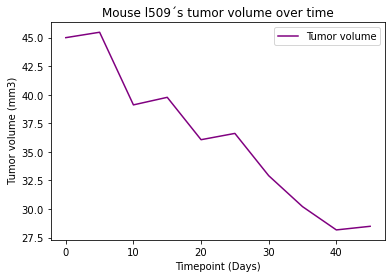

In [192]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_mice = clean_datas.loc[clean_datas["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")
Mouse_x401 = clean_datas.loc[clean_datas["Mouse ID"] == "x401"]

#Make variables to plot 
tumor_y = Mouse_x401["Tumor Volume (mm3)"]
time_x = Mouse_x401["Timepoint"]

# Plot line
plt.plot(time_x, tumor_y, color="purple", label="Tumor volume")

# lengend
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse l509´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

plt.show()

Text(0, 0.5, 'Tumor volume (mm3)')

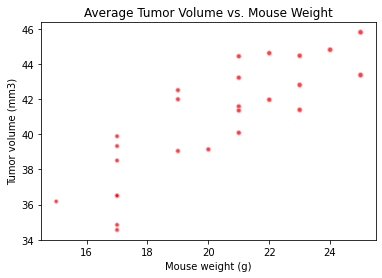

In [193]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_group =cap_mice.groupby(["Mouse ID"]).mean()
cap_group.head()

#Get average tumor volumen
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]

plt.scatter(avg_tumor_vol, avg_weight, facecolors="red", edgecolors="pink",
            s=avg_tumor_vol, alpha=0.75)

plt.title( "Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


/var/folders/81/4ft6r5ld7fz2g543gwvwg5sc0000gn/T/ipykernel_87649/2558238631.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(avg_tumor_vol,regress_values,"b-", color="lime")


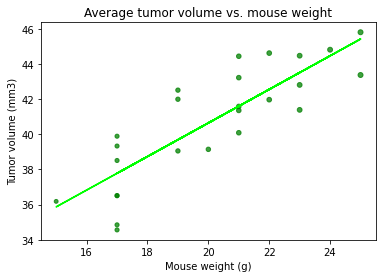

In [194]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept


plt.scatter(avg_tumor_vol, avg_weight, facecolors="green",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"b-", color="lime")


plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

